# 结合神经网络思维的逻辑回归

欢迎来到你的第一个（必修）编程作业！你将构建一个逻辑回归分类器去识别猫。这个任务将引导你如何使用神经网络思维去做事，并且也将磨练你对深度学习的直觉。

**Instructions:**
- 不要在代码中使用循环 (for/while)，除非是引言中明确要求让你去做的。

**你将学到:**
- 构建算法的通用架构，包括：
    - 初始化参数
    - 计算成本函数及其梯度
    - 使用优化算法（梯度下降）
- 按顺序将上面三个函数集成到一个主模型函数中。

## 1 - 相关 Python 包 ##

首先，让我们运行下面的单元格去导入这个作业中你将使用的包。

- [numpy](www.numpy.org) 是 Python 中用于科学计算的基础包。
- [h5py](http://www.h5py.org) 是一个常用的包，用于处理存储在H5文件中的数据集。
- [matplotlib](http://matplotlib.org) 是 Python 中用于绘制图形的著名库。
- [skimage](https://scikit-image.org/) 在最后用你自己的图片来测试你的模型。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import skimage

%matplotlib inline

## 2 - 问题集中概述 ##

**问题陈述**: 给定一个数据集 (data.h5)，其中包含：
- m_train：图像的训练集，标记为猫 (y=1) 或非猫 (y=0)
- m_test：图像的测试集，标记为猫 (y=1) 或非猫 (y=0)
- 每个图像的形状 (num_px, num_px, 3) 其中 3 是指三通道 (RGB)。因此每个图像都是正方形 (height = num_px = width)

你将创建一个简单的图像识别算法，它可以正确地将图片分类为猫或非猫。

让我们更熟悉这个数据集。运行下面的代码来加载数据。

`load_dataset()` 会默认访问当前目录下的 `datasets/train_catvnoncat.h5` 文件去读取数据集

In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
# 加载数据 (猫/非猫)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

我们在图像数据集（训练集和测试集）的末尾添加了 `_orig`，因为我们要对它们进行预处理。预处理后，我们最终得到 `train_set_x` 和 `test_set_x`（标签 `train_set_y` 和 `test_set_y` 不需要任何预处理）。

`train_set_x_orig` 和 `test_set_x_orig` 中的每一行都是一个表示图像的数组。您可以通过运行以下代码来可视化示例。也可以随意更改 `index` 值并重新运行以查看其他图像。

y = [1], 这是一只 'cat' 图片。


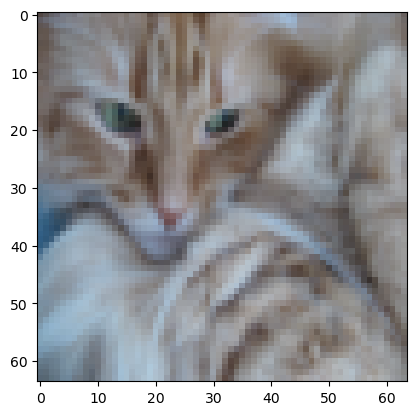

In [4]:
# 图片示例
index = 2
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", 这是一只 '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' 图片。")

深度学习中的许多软件 bug 来自于矩阵/向量维度不匹配。如果你能保持矩阵/向量的维度正确，你将会消除许多 bug。

**练习:** 找出下列值：

- `m_train`：训练集样本数量
- `m_test`：测试集样本数量
- `num_px`：单个训练图像的大小

记住 `train_set_x_orig` 是一个形状为 `(m_train, num_px, num_px, 3)` 的 numpy 数组。

**示例:** 你可以通过 `train_set_x_orig.shape[0]` 来表示  `m_train`。

In [5]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("训练集样本数量: m_train = " + str(m_train))
print ("测试集样本数量: m_test = " + str(m_test))
print ("每张图像的高/宽: num_px = " + str(num_px))
print ("每张图像的大小: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x 形状: " + str(train_set_x_orig.shape))
print ("train_set_y 形状: " + str(train_set_y.shape))
print ("test_set_x 形状: " + str(test_set_x_orig.shape))
print ("test_set_y 形状: " + str(test_set_y.shape))

训练集样本数量: m_train = 209
测试集样本数量: m_test = 50
每张图像的高/宽: num_px = 64
每张图像的大小: (64, 64, 3)
train_set_x 形状: (209, 64, 64, 3)
train_set_y 形状: (1, 209)
test_set_x 形状: (50, 64, 64, 3)
test_set_y 形状: (1, 50)


**m_train, m_test 以及 num_px 的预计输出**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td> 
  </tr>
  
</table>


为了方便后续计算，你现在应该将形状为 `(num_px, num_px, 3)` 的图像重塑为形状为 `(num_px*num_px*3, 1)` 的 numpy 数组。后面我们的训练（和测试）数据集是一个 numpy 数组，其中每一列表示一个扁平化后的图像。应该有 `m_train` 和 `m_test` 列。

**练习:** 重塑训练数据集和测试数据集，使一张大小为 `(num_px, num_px, 3)` 的图像被平展为形状为 `(num_px*num_px*3, 1)` 的单个向量

当你想将形状为 `(a, b, c, d)` 的矩阵 $X$ 扁平化为形状为 `(b*c*d, a)` 的矩阵 $X\_flatten$ 时，有一个技巧：

```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T 是矩阵 X 的转置矩阵
```

In [6]:
# 重塑训练集和测试集

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten 形状: " + str(train_set_x_flatten.shape))
print ("train_set_y 形状: " + str(train_set_y.shape))
print ("test_set_x_flatten 形状: " + str(test_set_x_flatten.shape))
print ("test_set_y 形状: " + str(test_set_y.shape))
print ("重塑后的完整性检查: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten 形状: (12288, 209)
train_set_y 形状: (1, 209)
test_set_x_flatten 形状: (12288, 50)
test_set_y 形状: (1, 50)
重塑后的完整性检查: [17 31 56 22 33]


**预计输出**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td> 
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

要表示彩色图像，必须为每个像素指定红、绿、蓝通道 (RGB)，因此像素值实际上是一个向量，由 3 个数字组成，范围为 0 ~ 255。

在机器学习中，一个常见的预处理步骤是 **中心化** 和 **标准化** 数据集，即从每个样本中减去整个 numpy 数组的平均值，然后将每个样本除以整个 numpy 数组的标准差。但对于图片数据集来说，更简单、更方便，将数据集的每行除以 255（像素通道的最大值）也是有同样的效果。

在模型训练过程中，为了观察神经元的激活情况，需要对一些初始输入进行权重相乘和偏置。然后使用梯度进行反向传播来训练模型。但是，极其重要的是每个特征都有一个相似的范围，这样我们的梯度就不会爆炸。你会在后面的课程中看到更多细节。

让我们标准化我们的数据集。

In [7]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

<font color='blue'>

**需要记住的是：**

预处理新数据集的常见步骤如下：
- 找出数据集的大小和形状 `(m_train, m_test, num_px, ...)`
- 重塑数据集，使每个样本都是一个大小为 `(num_px * num_px * 3, 1)` 的向量
- “标准化” 数据

## 3 - 学习算法的通用架构 ##

现在是时候设计一个简单的算法去区分猫和非猫的图像。

您将使用神经网络思维方式构建逻辑回归。下图解释了 **逻辑回归其实是一个非常简单的神经网络！** 其中的原因

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**算法的数学表达式**：

举例来说 $x^{(i)}$：

$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

然后通过对所有训练样本求和来计算成本：

$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**关键步骤**：
在这个练习中，你将执行以下步骤：
1. 初始化模型参数
2. 通过最小化成本来学习模型的参数
3. 使用学习参数进行预测（在测试集上）
4. 分析结果并得出结论

## 4 - 构建算法的各个部分 ## 

构建神经网络的主要步骤是：
1. 定义模型框架（例如输入特征的数量） 
2. 初始化模型的参数
3. 循环:
    - 计算当前损失（前向传播）
    - 计算当前梯度（后向传播）
    - 更新参数（梯度下降）

你经常单独构建 1-3 个函数，并将它们集成到我们调用的一个函数中 `model()`.


### 4.1 - 辅助函数 sigmoid 函数

**练习**: 使用从 "Python Basics" 学到的代码，执行 `sigmoid()`。正如你在上面中看到的，你需要使用 `np.exp()` 来计算 $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ 来进行预测。

In [8]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    计算 z 的 sigmoid
 
    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1.0 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [9]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**预计输出**: 

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### 4.2 - 初始化参数 `initialize_with_zeros()`

**练习:** 在下面的单元格中实现参数初始化。你必须将 w 初始化为一个 0 向量。如果您不知道使用 numpy 函数，请在 numpy 库的文档中查找 `np.zeros()`。

In [10]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    这个函数为 w 初始化为一个形状为 (dim, 1) 的 0 向量，并将 b 初始化为 0.

    Argument:
    dim -- 我们想要的 w 的大小（在本例中是参数的数量）
    
    Returns:
    w -- 形状为 (dim, 1) 的初始化后向量
    b -- 初始化后的常量（对应于 bias）
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [11]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = \n" + str(w))
print ("b = " + str(b))

w = 
[[0.]
 [0.]]
b = 0


**预计输出**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

对于图像输入，w 是形状为 `(num_px * num_px * 3, 1)` 的矩阵。

### 4.3 - 正向和反向传播 `propagate()`

现在参数已经初始化，您可以进行 “正向” 和 “反向” 传播步骤来学习参数。

**练习:** 执行函数 `propagate()` 计算成本函数及其梯度。

**提示**:

后向传播：
- 你有一个矩阵 $X$
- 计算激活函数：$A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- 计算成本函数：$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

下面是你将用到的两个公式：

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [12]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    实现上述传播的成本函数及其梯度

    Arguments:
    w -- 权重，大小为 (num_px * num_px * 3, 1) 的 numpy 数组。
    b -- 偏差，一个常量
    X -- 形状为 (num_px * num_px * 3, 示例数量) 的数据集
    Y -- true "标签" 向量（非猫包含0，猫包含1），形状为 (1, 示例数量)

    Return:
    cost -- 逻辑回归的负对数似然代价
    dw -- 损失函数相对于 w 的梯度，因此形状与 w 相同
    db -- 损失函数相对于 b 的梯度，因此形状与 b 相同
    
    Tips:
    - 使用 np.log(), np.dot() 逐步编写传播的代码。 
    """
    
    m = X.shape[1]
    
    # 前向传播（从 X 到成本函数）
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)    # 计算激活函数
    cost  = - np.sum(Y * np.log(A) + (1-Y) * np.log(1-A)) / m # 计算成本函数
    ### END CODE HERE ###
    
    # 后向传播（找到梯度）
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = 1 / m * np.dot(X, (A-Y).T)
    db = 1 / m * np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [13]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = \n" + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = 
[[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


**预计输出**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
        <td> [[ 0.99993216]
 [ 1.99980262]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.499935230625 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 6.000064773192205</td>
    </tr>

</table>

### 4.4 - 优化 `optimize()`

- 你已经初始化了模型的参数。
- 你也能够计算成本函数及其梯度。
- 现在，你要使用梯度下降更新参数。

**练习:** 写下优化函数。目标是通过最小化成本函数 $J$ 来学习 $w$ 和 $b$。对于参数 $\theta$，更新规则为 $ \theta = \theta - \alpha d\theta$，这里的 $\alpha$ 指学习率。

In [14]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    该函数通过使用梯度下降算法来优化 w 和 b
    
    Arguments:
    w -- 权重，大小为 (num_px * num_px * 3, 1) 的 numpy 数组。
    b -- 偏差，一个标量
    X -- 形状为 (num_px * num_px * 3, 示例数量) 的数据集
    Y -- true 的 “标签” 向量（非猫包含0，猫包含1），形状为 (1, 样本数量)
    num_iterations -- 优化循环的迭代次数
    learning_rate -- 梯度下降更新规则的学习率
    print_cost -- 每 100 次打印一次成本值
    
    Returns:
    params -- 包含权重 w 和偏差 b 的字典
    grads -- 包含相对于成本函数的权重梯度和偏差的字典
    costs -- 优化过程中计算的所有成本列表，这将用于绘制学习曲线。
    
    Tips:
    你基本上需要写下两个步骤并遍历它们：
        1) 使用 propagate() 计算当前参数的成本和梯度。
        2) 使用梯度下降规则更新 w 和 b 的参数。
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # 计算成本和梯度 (≈ 1-4 lines of code)
        ### START CODE HERE ###
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # 从梯度中检索导数
        dw = grads["dw"]
        db = grads["db"]
        
        # 更新规则 (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # 记录成本值
        if i % 100 == 0:
            costs.append(cost)
        
        # 打印每 100 个训练示例的成本
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [15]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = \n" + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = \n" + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = 
[[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = 
[[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


**预计输出**: 

<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.1124579 ]
 [ 0.23106775]] </td>
    </tr>
    <tr>
       <td> **b** </td>
       <td> 1.55930492484 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.90158428]
 [ 1.76250842]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.430462071679 </td>
    </tr>

</table>

### 4.5 - 预测 `predict()`

**练习:** 前面的函数将输出学习到的 w 和 b。我们可以使用 w 和 b 来预测数据集 X 的标签。实现 `predict()`函数主要分两步：

1. 计算 $\hat{Y} = A = \sigma(w^T X + b)$

2. 将 $A$ 中的元素转换为 0（激活值 <= 0.5）或 1（激活值 > 0.5），将预测结果存储在向量 `Y_prediction` 中。如果你愿意，你可以在 `for` 循环中使用 `If`/`else` 语句（尽管也有一种向量化它的方法）。

In [16]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    使用学习到的逻辑回归参数 (w, b) 预测标签是 0 还是 1
    
    Arguments:
    w -- 权重，大小为 (num_px * num_px * 3, 1) 的 numpy 数组。
    b -- 偏差，一个标量
    X -- 大小为 (num_px * num_px * 3, 示例数量) 的数据集
    
    Returns:
    Y_prediction -- 一个 numpy 数组（向量），包含 X 中所有预测结果 (0/1)
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # 计算向量 "A" 预测图片中出现猫的概率
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # 将概率 A[0,i] 转换为实际预测 p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction = np.around(A).astype(np.int64) # 对整个数组进行四舍五入计算，然后保留 numpy 整数类型
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [17]:
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1 1]]


**预计输出**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.]]
         </td>  
   </tr>

</table>


<font color='blue'>

**需要记住的是：**
你已经实现了几个函数:
- 初始化 (w,b)
- 迭代优化损失函数以学习参数 (w,b)：
    - 计算成本及其梯度
    - 使用梯度下降更新参数
- 使用学习到的 (w,b) 来预测给定样本集的标签

## 5 - 将所有函数合并到一个模型中 ##

现在，您将看到整个模型是如何以正确的顺序将所有构建块（前面部分中实现的函数）放在一起的。

**练习:** 实现模型函数，使用如下表示方法:
- `Y_prediction` 表示你在测试集上的预测
- `Y_prediction_train` 表示你对训练集的预测
- 函数 `optimize()` 输出的是：权重 w、成本 cost、梯度 grads

In [41]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    通过调用之前实现的函数来构建逻辑回归模型
    
    Arguments:
    X_train -- 训练集：由形状为 (num_px * num_px * 3, m_train) 的 numpy 数组表示
    Y_train -- 训练集的标签：由形状为 (1, m_train) 的 numpy 数组（向量）表示
    X_test -- 测试集：由形状为 (num_px * num_px * 3, m_test) 的 numpy 数组表示
    Y_test -- 测试集的标签：由形状为 (1, m_test) 的 numpy 数组（向量）表示
    num_iterations -- 表示优化参数的迭代次数的超参数
    learning_rate -- 表示 optimize() 更新规则中使用的学习率的超参数
    print_cost -- 设置为 true，每 100 次迭代打印一次代价
    
    Returns:
    d -- 包含模型信息的字典。
    """
    
    ### START CODE HERE ###
    
    # 将参数初始化为 0 (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])
    # 梯度下降 (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    # 从字典 “parameters” 中检索参数 w 和 b
    w = parameters["w"]
    b = parameters["b"]
    
    # 预测测试/训练集示例 (≈ 2 lines of code)
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    ### END CODE HERE ###

    # 打印训练集/测试集精度
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

运行下面的单元格去训练你的模型。

In [45]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 25000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.823921
Cost after iteration 200: 0.418944
Cost after iteration 300: 0.617350
Cost after iteration 400: 0.522116
Cost after iteration 500: 0.387709
Cost after iteration 600: 0.236254
Cost after iteration 700: 0.154222
Cost after iteration 800: 0.135328
Cost after iteration 900: 0.124971
Cost after iteration 1000: 0.116478
Cost after iteration 1100: 0.109193
Cost after iteration 1200: 0.102804
Cost after iteration 1300: 0.097130
Cost after iteration 1400: 0.092043
Cost after iteration 1500: 0.087453
Cost after iteration 1600: 0.083286
Cost after iteration 1700: 0.079487
Cost after iteration 1800: 0.076007
Cost after iteration 1900: 0.072809
Cost after iteration 2000: 0.069860
Cost after iteration 2100: 0.067132
Cost after iteration 2200: 0.064601
Cost after iteration 2300: 0.062247
Cost after iteration 2400: 0.060053
Cost after iteration 2500: 0.058002
Cost after iteration 2600: 0.056081
Cost after iteration 2700: 0.054279
Cost

**预计输出**: 

<table style="width:40%"> 
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 99.04306220095694 % </td>
    </tr>
    <tr>
        <td>**Test Accuracy** </td> 
        <td> 70.0 % </td>
    </tr>
</table> 




**评论**: 训练集准确率接近 100%。这是一个很好的完整性检查：您的模型正常工作，并且有足够的容量来拟合训练数据。测试集准确率为 70%，对于这个简单的模型来说，它实际上还不错，因为我们使用的数据集很小，而且逻辑回归是一个线性分类器。但不用担心，下周我们将构建一个更好的分类器!

此外，您可以看到该模型显然过拟合了训练数据。稍后我们将学习如何减少过拟合，例如使用正则化。使用下面的代码（并更改 `index` 变量），您可以查看对测试集图片的预测。

y = [0], 你预测它是一个 "non-cat" 图片。


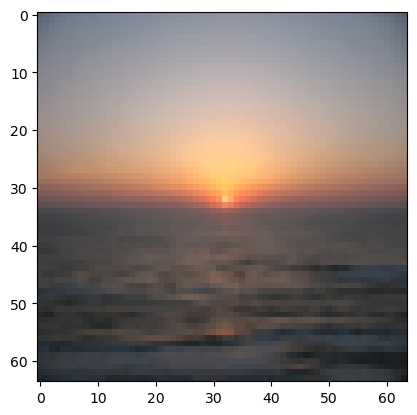

In [27]:
# 图片被错误分类的示例
index = 35
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[:, index]) + ", 你预测它是一个 \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") + "\" 图片。")

接下来，我们还要绘制成本函数和梯度的图像。

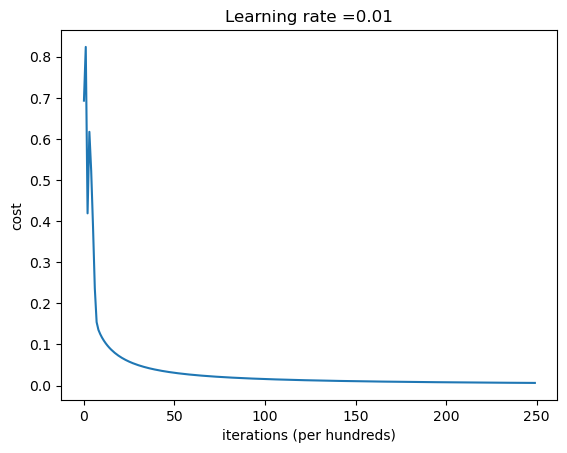

In [46]:
# 绘制学习曲线（包含成本 cost）
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**解析：**
你可以看到成本在下降。它表明参数正在被学习。但是，您可以看到，您可以在训练集上进一步训练模型。尝试增加上面单元格中的迭代次数并重新运行单元格。你可能会发现训练集的精度上升了，但测试集的精度下降了，这被称为**过拟合**。

## 6 - 进一步分析（可选/不分级练习） ##

恭喜你建立了你自己的第一个图像分类模型。让我们进一步分析它，并检查学习率 $\alpha$ 的可能选择。

#### 6.1 选择学习率 ####

**提示**:
为了使梯度下降法发挥作用，你必须明智地选择学习率。学习率 $\alpha$ 决定了我们更新参数的速度。如果学习率太大，我们可能会 “超过” 最优值。类似地，如果它太小，我们将需要过多的迭代才能收敛到最佳值。这就是为什么使用一个调整好的学习率至关重要。

让我们将模型的学习曲线与几种学习率的选择进行比较。运行下面的单元格。这大约需要1分钟。你也可以尝试不同于我们初始化的 `learning_rates` 变量的三个值，看看会发生什么。

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



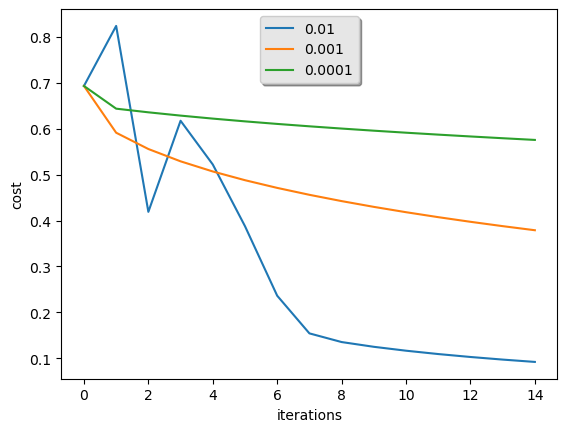

In [38]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**解析：**
- 不同的学习率给出不同的代价，因此预测结果也不同。
- 如果学习率太大 (0.01)，成本可能会上下波动。它甚至可能会发散（尽管在这个例子中，使用 0.01 最终仍然会得到一个很好的成本值）。
- 更低的成本并不意味着更好的模型。你必须检查是否可能存在过拟合。当训练精度远远高于测试精度时，就会发生这种情况。
- 在深度学习中，我们通常建议你:
    - 选择更好地最小化成本函数的学习率。
    - 如果你的模型过拟合，使用其他技术来减少过拟合。（我们将在后面的视频中讨论这个。）

## 7 - 用自己的图片测试（可选/不评分的练习） ##

恭喜你完成了这个作业。您可以使用自己的图像并查看模型的输出。需要这样做：

1. 点击笔记本上端栏的 "File"，然后点击 "open" 进入 Coursera Hub。
2. 将你的图像添加到 Jupyter Notebook 的 "images" 文件夹中
3. 在下面的代码中更改图像的名称
4. 运行代码并检查算法是否正确（1 是猫，0 不是猫）

y = 1, 你的算法预测这是一张 "cat" 图像。


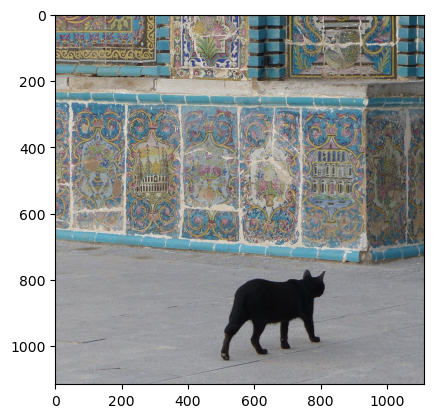

In [26]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "cat_in_iran.jpg"   #  将其更改为图像文件的名称
## END CODE HERE ##

# 我们对图像进行预处理以适应您的算法。
fname = "images/input/" + my_image

# 使用 matplotlib.pyplot.imread 来代替 scipy.ndimage.imread，因为后者已经被废弃了
# image = np.array(ndimage.imread(fname, flatten=False))
image = np.array(plt.imread(fname))

# 使用 skimage.transform.resize 来代替 scipy.misc.imresize，因为后者也已经被废弃了
# my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_image = skimage.transform.resize(image, output_shape=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", 你的算法预测这是一张 \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" 图像。")

<font color='blue'>

**在本次作业中需要要记住：**
1. 预处理数据集很重要。
2. 你分别实现了每个函数：`initialize()`、`propagate()` 和 `optimize()`。然后你构建了一个 `model()`。
3. 调整学习率 $\alpha$（超参数的一个例子）可以对算法产生很大的影响。稍后您将在本课程中看到更多示例！

最后，如果你愿意，我们邀请你在这个笔记本上尝试不同的东西。在尝试任何东西之前，请确保提交。提交后，你可以使用的内容包括:
- 调整学习率和迭代次数
- 尝试不同的初始化方法并比较结果
- 测试其他预处理过程（将数据居中，或按标准差划分每行）

参考书目：
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c